In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style

In [2]:
region = np.genfromtxt('205.csv',delimiter=',').astype(int)
total = np.genfromtxt('total.csv',delimiter=',').astype(int)
region_better = np.genfromtxt('205_better.csv',delimiter=',').astype(int)
total_better = np.genfromtxt('total_better.csv',delimiter=',').astype(int)

In [3]:
style.use('ggplot')
0 153 115

# This plot show that:
# Without sampling by region, label type distribution in a region will change when zoom out
# But if sampling are carried out region by region the distribution is preserved.

In [91]:
label_type_id = np.linspace(1,7,7)
label_type = ['Curb Ramp', 'No Curb Ramp','Obstacle','Suface Problem','Other', 'Occlusion','NoSidewalk']
tick_rotation = 15
title_font_size = 24
axes_font_size =20
tick_font_size = 16
ggplot_color=list(plt.rcParams['axes.prop_cycle'])[5]['color']
color_plan = (0,153/255,115/255)

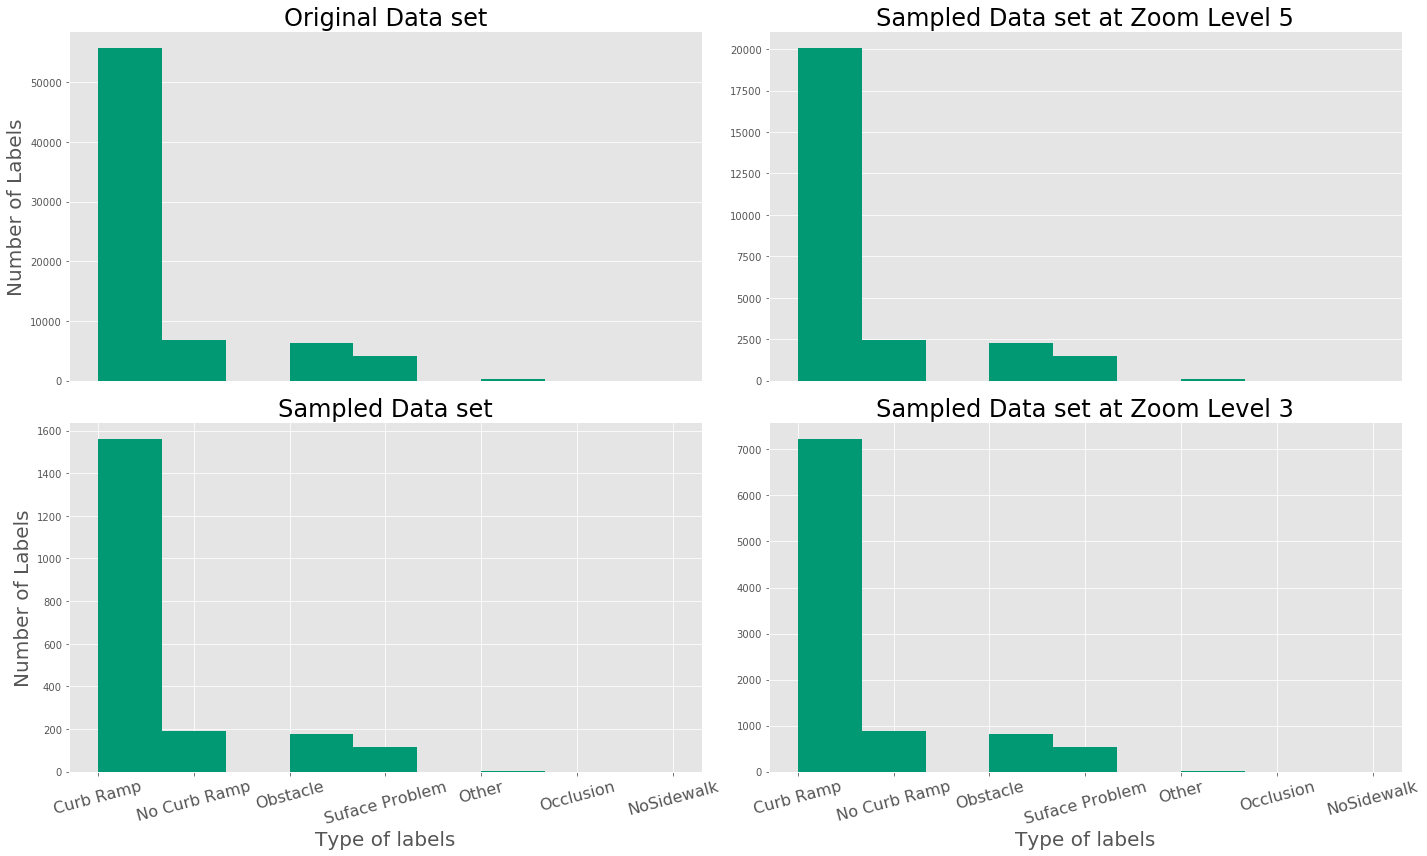

In [93]:
f, ax = plt.subplots(2,2,figsize = (20,12))
ax.flat[0].set_title("Original Data set",fontsize = title_font_size)
ax.flat[0].hist(label_type_id, 9, weights = total[7], color=color_plan)
ax.flat[0].set_ylabel("Number of Labels", fontsize= axes_font_size)
#ax.flat[0].set_xlabel("Type of labels", fontsize= axes_font_size)

ax.flat[1].set_title("Sampled Data set at Zoom Level 5",fontsize = title_font_size)
ax.flat[1].hist(label_type_id, 9, weights = total[5],color=color_plan)
#ax.flat[1].set_ylabel("Number of Labels", fontsize= axes_font_size)
#ax.flat[1].set_xlabel("Type of labels", fontsize= axes_font_size)

ax.flat[2].set_title("Sampled Data set",fontsize = title_font_size)
ax.flat[2].hist(label_type_id, 9, weights = total[0],color=color_plan)
ax.flat[2].set_ylabel("Number of Labels", fontsize= axes_font_size)
ax.flat[2].set_xlabel("Type of labels", fontsize= axes_font_size)

ax.flat[3].set_title("Sampled Data set at Zoom Level 3",fontsize = title_font_size)
ax.flat[3].hist(label_type_id, 9, weights = total[3],color=color_plan)
#ax.flat[3].set_ylabel("Number of Labels", fontsize= axes_font_size)
ax.flat[3].set_xlabel("Type of labels", fontsize= axes_font_size)
plt.sca(ax[0, 0])
plt.axis
plt.xticks([])
#plt.xticks(label_type_id, label_type, rotation =tick_rotation, fontsize = tick_font_size)
plt.sca(ax[0, 1])
plt.xticks([])
#plt.xticks(label_type_id, label_type, rotation =tick_rotation, fontsize = tick_font_size)
plt.sca(ax[1, 0])
plt.xticks(label_type_id, label_type, rotation =tick_rotation, fontsize = tick_font_size)
plt.sca(ax[1, 1])
plt.xticks(label_type_id, label_type, rotation =tick_rotation, fontsize = tick_font_size)
plt.tight_layout()
plt.show()
plt.savefig('Figure1.pdf')

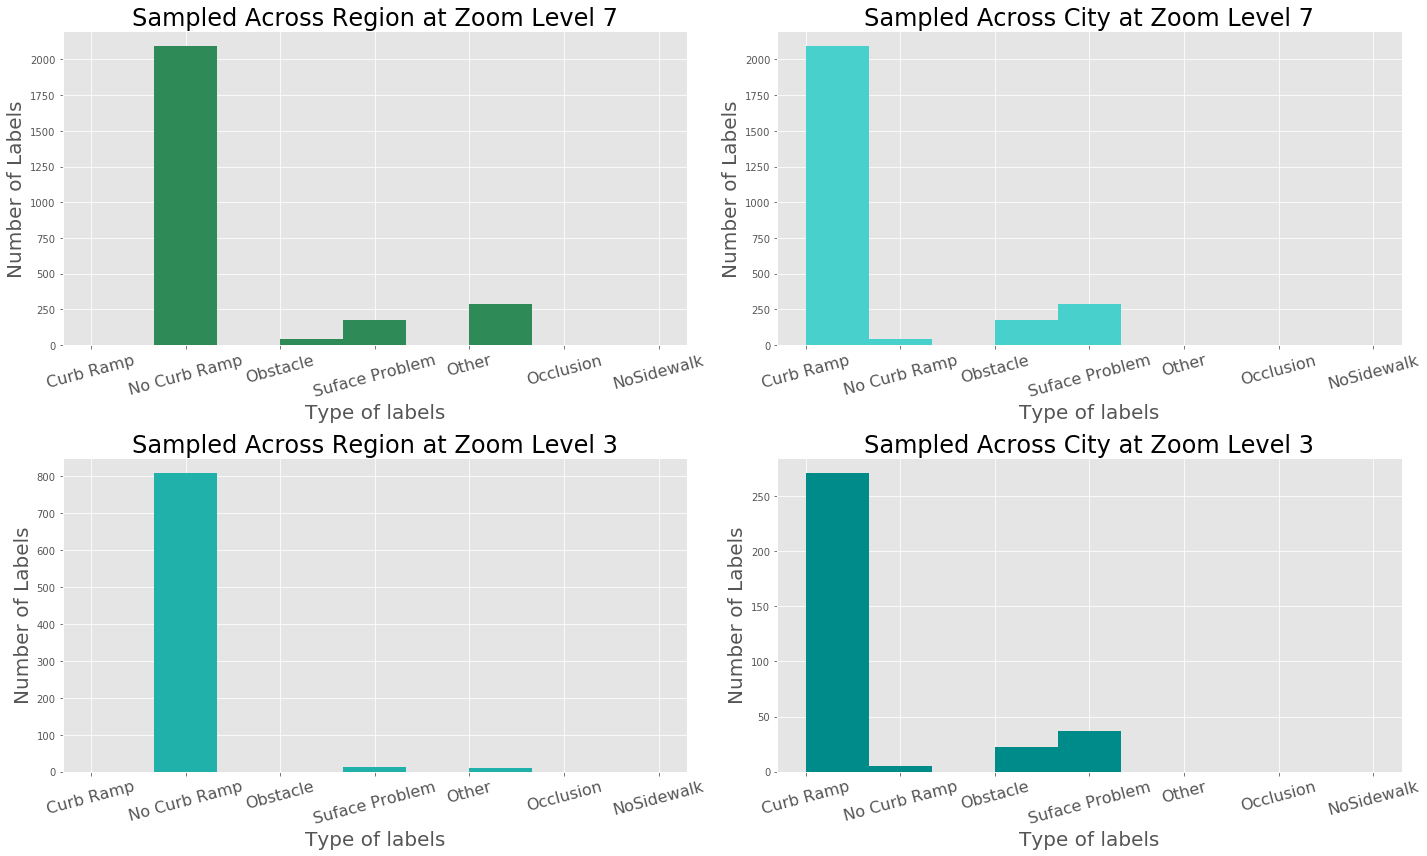

In [79]:
f, ax = plt.subplots(2,2,figsize = (20,12))
ax.flat[0].set_title("Sampled Across Region at Zoom Level 7",fontsize = title_font_size)
ax.flat[0].hist(label_type_id, 9, weights = region[7],color='seagreen')
ax.flat[0].set_ylabel("Number of Labels", fontsize= axes_font_size)
ax.flat[0].set_xlabel("Type of labels", fontsize= axes_font_size)

ax.flat[2].set_title("Sampled Across Region at Zoom Level 3",fontsize = title_font_size)
ax.flat[2].hist(label_type_id, 9, weights = region[3],color= 'lightseagreen')
ax.flat[2].set_ylabel("Number of Labels", fontsize= axes_font_size)
ax.flat[2].set_xlabel("Type of labels", fontsize= axes_font_size)

ax.flat[1].set_title("Sampled Across City at Zoom Level 7",fontsize = title_font_size)
ax.flat[1].hist(label_type_id, 9, weights = region_better[7],color= 'mediumturquoise')
ax.flat[1].set_ylabel("Number of Labels", fontsize= axes_font_size)
ax.flat[1].set_xlabel("Type of labels", fontsize= axes_font_size)

ax.flat[3].set_title("Sampled Across City at Zoom Level 3",fontsize = title_font_size)
ax.flat[3].hist(label_type_id, 9, weights = region_better[3],color= 'darkcyan')
ax.flat[3].set_ylabel("Number of Labels", fontsize= axes_font_size)
ax.flat[3].set_xlabel("Type of labels", fontsize= axes_font_size)
plt.sca(ax[0, 0])
plt.xticks(label_type_id, label_type, rotation =tick_rotation, fontsize = tick_font_size)
plt.sca(ax[0, 1])
plt.xticks(label_type_id, label_type, rotation =tick_rotation, fontsize = tick_font_size)
plt.sca(ax[1, 0])
plt.xticks(label_type_id, label_type, rotation =tick_rotation, fontsize = tick_font_size)
plt.sca(ax[1, 1])
plt.xticks(label_type_id, label_type, rotation =tick_rotation, fontsize = tick_font_size)
plt.tight_layout()
plt.show()
#plt.savefig('Figure1.pdf')

# This plot shows the distribution of label type is preserved in different zoom level

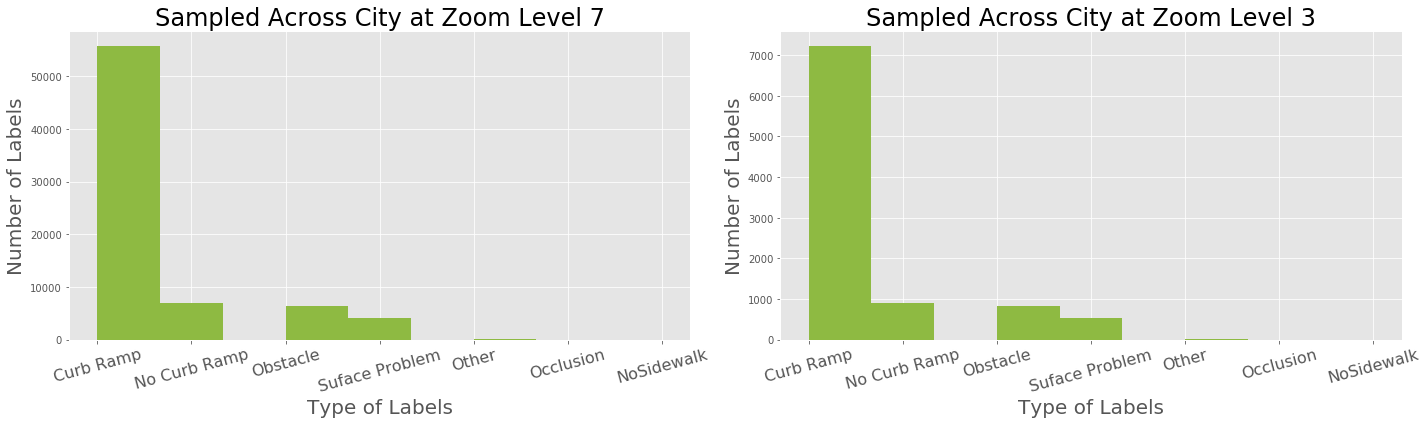

In [78]:
f, ax = plt.subplots(1,2,figsize = (20,6))
ax.flat[0].set_title("Sampled Across City at Zoom Level 7",fontsize = title_font_size)
ax.flat[0].hist(label_type_id, 9, weights = total[7],color=list(plt.rcParams['axes.prop_cycle'])[5]['color'])
ax.flat[0].set_ylabel("Number of Labels",fontsize = axes_font_size)
ax.flat[0].set_xlabel("Type of Labels",fontsize = axes_font_size)

ax.flat[1].set_title("Sampled Across City at Zoom Level 3",fontsize = title_font_size)
ax.flat[1].hist(label_type_id, 9, weights = total[3],color=list(plt.rcParams['axes.prop_cycle'])[5]['color'])
ax.flat[1].set_ylabel("Number of Labels",fontsize = axes_font_size)
ax.flat[1].set_xlabel("Type of Labels",fontsize = axes_font_size)
plt.sca(ax[0])
plt.xticks(label_type_id, label_type, rotation =tick_rotation, fontsize = tick_font_size)
plt.sca(ax[1])
plt.xticks(label_type_id, label_type, rotation =tick_rotation, fontsize = tick_font_size)

plt.tight_layout()
plt.show()
#plt.savefig('Figure2.pdf')

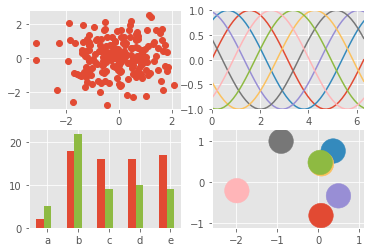

In [50]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

# Fixing random state for reproducibility
np.random.seed(19680801)

fig, axes = plt.subplots(ncols=2, nrows=2)
ax1, ax2, ax3, ax4 = axes.ravel()

# scatter plot (Note: `plt.scatter` doesn't use default colors)
x, y = np.random.normal(size=(2, 200))
ax1.plot(x, y, 'o')

# sinusoidal lines with colors from default color cycle
L = 2*np.pi
x = np.linspace(0, L)
ncolors = len(plt.rcParams['axes.prop_cycle'])
shift = np.linspace(0, L, ncolors, endpoint=False)
for s in shift:
    ax2.plot(x, np.sin(x + s), '-')
ax2.margins(0)

# bar graphs
x = np.arange(5)
y1, y2 = np.random.randint(1, 25, size=(2, 5))
width = 0.25
ax3.bar(x, y1, width)
ax3.bar(x + width, y2, width,
        color=list(plt.rcParams['axes.prop_cycle'])[5]['color'])
ax3.set_xticks(x + width)
ax3.set_xticklabels(['a', 'b', 'c', 'd', 'e'])

# circles with colors from default color cycle
for i, color in enumerate(plt.rcParams['axes.prop_cycle']):
    xy = np.random.normal(size=2)
    ax4.add_patch(plt.Circle(xy, radius=0.3, color=color['color']))
ax4.axis('equal')
ax4.margins(0)

plt.show()

TypeError: data type not understood

In [35]:
y

[1, 1, 3, 1, 1, 1, 1, 1, 1, 1]